In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pylab import cm


In [2]:
gt = np.loadtxt('/home/dhagash/tmp/VIO_MSR/datasets/phenorob/front/groundtruth.txt')
vo_poses = np.loadtxt('/home/dhagash/tmp/VIO_MSR/eval_data/front/apples_big_2021-10-14-all/superpoint/PnP/poses_skip_35.txt')

In [4]:
T_rot =  np.array([[0, -1, 0], [1, 0, 0], [0, 0, 1]]) @ np.array([[0, 0, -1], [0, 1, 0], [1, 0, 0]])


In [5]:
vo_poses = vo_poses[:,1:4] @ T_rot

In [6]:
x = vo_poses[:, 0]
y = vo_poses[:, 1]
z = vo_poses[:, 2]

gt_x = gt[:, 1]
gt_y = gt[:, 2]
gt_z = gt[:, 3]

In [75]:
mpl.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.linewidth'] = 2
cmap = cm.get_cmap('Dark2',4)

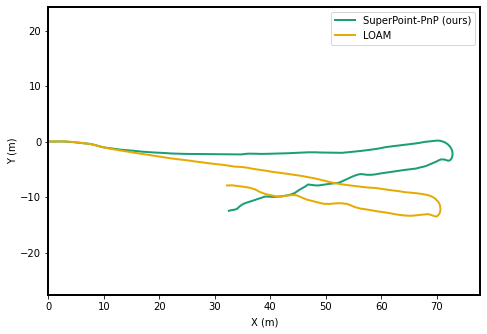

In [93]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(x, y,linewidth=2,color= cmap(0),label='SuperPoint-PnP (ours)')
ax.plot(gt_x, gt_y,linewidth=2,color= cmap(2),label='LOAM')
ax.axis('equal')
ax.set_xlim(min(np.min(x),np.min(gt_x)), max(np.max(x),np.max(gt_x))+5)
ax.set_ylim(min(np.min(y),np.min(gt_y))+10, max(np.max(y),np.max(gt_y)))
# ax.set_aspect('equal', 'datalim',anchor='NE')
ax.legend()
ax.set_xlabel('X (m)', labelpad=5)
ax.set_ylabel('Y (m)', labelpad=3)
plt.savefig('Final_Plot.png', dpi=300, transparent=False, bbox_inches='tight')
plt.show()

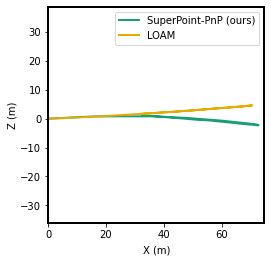

In [109]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(x, z,linewidth=2,color= cmap(0),label='SuperPoint-PnP (ours)')
ax.plot(gt_x, gt_z,linewidth=2,color= cmap(2),label='LOAM')
ax.axis('equal')
ax.set_xlim(min(np.min(x),np.min(gt_x)), max(np.max(x),np.max(gt_x)) + 2)
ax.set_ylim(min(np.min(z),np.min(gt_z)), 5)
# ax.set_aspect('equal', 'datalim',anchor='NE')
ax.legend()
ax.set_xlabel('X (m)', labelpad=5)
ax.set_ylabel('Z (m)', labelpad=3)
# plt.savefig('Final_Plot.png', dpi=300, transparent=False, bbox_inches='tight')
plt.show()